# Amazon Sales Dataset

## Índice

- [Depuración de los datos](#Depuración-de-los-datos)
- [Análisis de contenido](#Análisis-de-contenido)
- [Preprocesado y Normalización](#Preprocesado-y-Normalización)
- [Creación de etiquetas y Vectorización](#Creación-de-etiquetas-y-Vectorización)
- [División en train/test y Modelado](#División-en-train/test-y-Modelado)
- [Predicción](#Predicción)
- [Sistema de recomendación](#Sistema-de-recomendación)

## Librerías y carga de archivo

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from tqdm import tqdm
from wordcloud import WordCloud
tqdm.pandas()
from transformers import AutoTokenizer
import spacy
import scipy as sp
import en_core_web_sm
from imblearn.over_sampling import SMOTE
from textblob import TextBlob

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import (KFold, cross_val_score,cross_validate)
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings('ignore')

c:\Users\danie\anaconda3\envs\risk_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


Cargamos el archivo csv que contiene los datos necesarios y renombramos las variables.

In [2]:
reviews = pd.read_csv('C:\\Users\\danie\\Desktop\\TFM\\Amazon Reviews.csv')

In [3]:
reviews.rename({'product_id': 'ID_producto', 'product_name': 'Producto', 'category': 'Categoria', 'discounted_price': 'Precio_descontado', 
                'actual_price': 'Precio_real', 'discount_percentage': 'Porcentaje_descuento', 'rating': 'Calificacion', 
                'rating_count': 'Recuento_votos', 'about_product': 'Descripcion_producto', 'user_id': 'ID_usuario', 'user_name': 'Nombre_usuario', 
                'review_id': 'ID_reseña', 'review_title': 'Titulo_reseña', 'review_content': 'Reseña', 'img_link':'Link_imagen',
                'product_link':'Link_producto'}, axis=1, inplace= True)

## Depuración de los datos

Para comenzar, utilizaremos las funciones ```head()```, ```info()``` y ```nunique()```, que nos proporcionarán los primeros datos.

In [4]:
reviews.head()

,ID_producto,Producto,Categoria,Precio_descontado,Precio_real,Porcentaje_descuento,Calificacion,Recuento_votos,Descripcion_producto,ID_usuario,Nombre_usuario,ID_reseña,Titulo_reseña,Reseña,Link_imagen,Link_producto
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [5]:
reviews.Reseña.value_counts()

Reseña
I am not big on camera usage, personally. I was even mentally prepared for a bad camera, based on some reviews here. But I was pleasantly surprised that camera clicks good photos. They are not awesome, but they are decent photos that can even be shared.Now coming to my biggest grouse; heating issue. The phone started heating up while charging, but it was just a little and so I could have ignored it. But then it started heating up more and got me very concerned. I even ordered a replacement thinking I got a defective piece. But then, after further tests, I found that it is heating more when I download huge amounts of data, for example, when I restore data of my old phone, from back up. This is ok with me as, I don't perform huge data loads regularly, definitely not on phone. Then I tested by running tasks I usually perform such as checking office mails, attending office meeting on phone, watching a video from Amazon Prime, and so on. The phone did not heat up even a little. Perso

In [6]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID_producto           1465 non-null   object
 1   Producto              1465 non-null   object
 2   Categoria             1465 non-null   object
 3   Precio_descontado     1465 non-null   object
 4   Precio_real           1465 non-null   object
 5   Porcentaje_descuento  1465 non-null   object
 6   Calificacion          1465 non-null   object
 7   Recuento_votos        1463 non-null   object
 8   Descripcion_producto  1465 non-null   object
 9   ID_usuario            1465 non-null   object
 10  Nombre_usuario        1465 non-null   object
 11  ID_reseña             1465 non-null   object
 12  Titulo_reseña         1465 non-null   object
 13  Reseña                1465 non-null   object
 14  Link_imagen           1465 non-null   object
 15  Link_producto         1465 non-null   

In [7]:
reviews.nunique()

ID_producto             1351
Producto                1337
Categoria                211
Precio_descontado        550
Precio_real              449
Porcentaje_descuento      92
Calificacion              28
Recuento_votos          1143
Descripcion_producto    1293
ID_usuario              1194
Nombre_usuario          1194
ID_reseña               1194
Titulo_reseña           1194
Reseña                  1212
Link_imagen             1412
Link_producto           1465
dtype: int64

Ahora utilizaremos la función ```isnull()``` para ver si hay nulos en el dataset.

In [8]:
reviews.isnull().sum()

ID_producto             0
Producto                0
Categoria               0
Precio_descontado       0
Precio_real             0
Porcentaje_descuento    0
Calificacion            0
Recuento_votos          2
Descripcion_producto    0
ID_usuario              0
Nombre_usuario          0
ID_reseña               0
Titulo_reseña           0
Reseña                  0
Link_imagen             0
Link_producto           0
dtype: int64

Como solo hay dos nulos, lo que haremos será eliminarlos.

In [9]:
reviews = reviews.dropna()
reviews.isnull().sum()

ID_producto             0
Producto                0
Categoria               0
Precio_descontado       0
Precio_real             0
Porcentaje_descuento    0
Calificacion            0
Recuento_votos          0
Descripcion_producto    0
ID_usuario              0
Nombre_usuario          0
ID_reseña               0
Titulo_reseña           0
Reseña                  0
Link_imagen             0
Link_producto           0
dtype: int64

Si volvemos a observar el resultado obtenido con ```info()``` vemos que todas las variables son de tipo object, lo que a simple vista vemos que no es así. Debemos corregirlas.


* A *Precio_descontado y Precio_real* habría que quitarles el símbolo de la rupia india y convertirlas a tipo float.

* A *Porcentaje_descuento* habría que quitarle el símbolo del porcentaje (%) y convertirlo a tipo float.

* A *Recuento_votos* habría que quitarle el símbolo de la coma (,) y convertirlo a tipo int.

* *Calificacion* tiene en sus valores un valor | que hay que eliminar y convertir la variable a tipo float con ```to_numeric()```

In [10]:
reviews['Precio_descontado'] = reviews['Precio_descontado'].astype(str).str.replace('₹', '').str.replace(',', '').astype(float)
reviews['Precio_real'] = reviews['Precio_real'].astype(str).str.replace('₹', '').str.replace(',', '').astype(float)
reviews['Porcentaje_descuento'] = reviews['Porcentaje_descuento'].astype(str).str.replace('%', '').astype(float)
reviews['Recuento_votos'] = reviews['Recuento_votos'].astype(str).str.replace(',', '').astype(int)
reviews['Calificacion'] = pd.to_numeric(reviews['Calificacion'].astype(str).str.replace('|', ''), errors='coerce')

Hacemos un ```dropna()``` para eliminar el nulo que se ha creado en la variable *Calificacion* al eliminar |

In [11]:
reviews = reviews.dropna() 

Observamos nuestro dataset para ver las correcciones.

In [12]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1462 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_producto           1462 non-null   object 
 1   Producto              1462 non-null   object 
 2   Categoria             1462 non-null   object 
 3   Precio_descontado     1462 non-null   float64
 4   Precio_real           1462 non-null   float64
 5   Porcentaje_descuento  1462 non-null   float64
 6   Calificacion          1462 non-null   float64
 7   Recuento_votos        1462 non-null   int32  
 8   Descripcion_producto  1462 non-null   object 
 9   ID_usuario            1462 non-null   object 
 10  Nombre_usuario        1462 non-null   object 
 11  ID_reseña             1462 non-null   object 
 12  Titulo_reseña         1462 non-null   object 
 13  Reseña                1462 non-null   object 
 14  Link_imagen           1462 non-null   object 
 15  Link_producto         1462

Podemos eliminar las variables *Link_imagen* y *Link_producto* ya que no las necesitamos para lo que queremos hacer.

In [13]:
reviews.drop(columns = ["Link_imagen", "Link_producto"], inplace = True)

A continuación vamos a observar cada variable con ```value_counts()``` para ver que otras correcciones podemos realizar o a que otras conclusiones podemos llegar.

1. **Categoria**: esta variable recoge las categorías de los productos de manera jerárquica separando las distintas jerarquías con el signo |. Realmente nos interesaría la última categorización, por lo que la solución que se propone es eliminar los signos | y quedarnos con esta última categoría. Así podremos luego pasarla a tipo category, que es su verdadera tipología.

In [14]:
reviews.Categoria.value_counts()

Categoria
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables                                          231
Electronics|WearableTechnology|SmartWatches                                                                                 76
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones                                                        68
Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions                                                               63
Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear                                                                52
                                                                                                                          ... 
Electronics|Cameras&Photography|Accessories|Batteries&Chargers|BatteryChargers                                               1
Computers&Accessories|NetworkingDevices|DataCards&Dongles                                            

In [15]:
reviews['Categoria'] = reviews['Categoria'].str.split('|').str[0]

In [16]:
reviews.Categoria.value_counts()

Categoria
Electronics              526
Computers&Accessories    451
Home&Kitchen             447
OfficeProducts            31
MusicalInstruments         2
HomeImprovement            2
Toys&Games                 1
Car&Motorbike              1
Health&PersonalCare        1
Name: count, dtype: int64

In [17]:
reviews['Categoria'] = reviews['Categoria'].astype('category')

In [18]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1462 entries, 0 to 1464
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   ID_producto           1462 non-null   object  
 1   Producto              1462 non-null   object  
 2   Categoria             1462 non-null   category
 3   Precio_descontado     1462 non-null   float64 
 4   Precio_real           1462 non-null   float64 
 5   Porcentaje_descuento  1462 non-null   float64 
 6   Calificacion          1462 non-null   float64 
 7   Recuento_votos        1462 non-null   int32   
 8   Descripcion_producto  1462 non-null   object  
 9   ID_usuario            1462 non-null   object  
 10  Nombre_usuario        1462 non-null   object  
 11  ID_reseña             1462 non-null   object  
 12  Titulo_reseña         1462 non-null   object  
 13  Reseña                1462 non-null   object  
dtypes: category(1), float64(4), int32(1), object(8)
memory usage:

2. **Reseña**: con las reseñas vemos graves problemas que iremos desarrollando conforme vayamos identificando.

In [19]:
reviews.Reseña.value_counts()

Reseña
I am not big on camera usage, personally. I was even mentally prepared for a bad camera, based on some reviews here. But I was pleasantly surprised that camera clicks good photos. They are not awesome, but they are decent photos that can even be shared.Now coming to my biggest grouse; heating issue. The phone started heating up while charging, but it was just a little and so I could have ignored it. But then it started heating up more and got me very concerned. I even ordered a replacement thinking I got a defective piece. But then, after further tests, I found that it is heating more when I download huge amounts of data, for example, when I restore data of my old phone, from back up. This is ok with me as, I don't perform huge data loads regularly, definitely not on phone. Then I tested by running tasks I usually perform such as checking office mails, attending office meeting on phone, watching a video from Amazon Prime, and so on. The phone did not heat up even a little. Perso

En primer lugar vamos a eliminar los duplicados que podamos encontrarnos en esta variable.

In [20]:
reviews = reviews.drop_duplicates()

In [21]:
reviews_sin_duplicados = reviews.drop_duplicates(subset=['ID_producto', 'Reseña'], keep='first')

In [22]:
reviews = reviews.drop_duplicates(subset='Reseña', keep='first')

Vamos a obtener adicionalmente un histograma con el que poder visualizar la longitud de las reseñas y la frecuencia de estas longitudes. 

<Figure size 1400x1200 with 0 Axes>

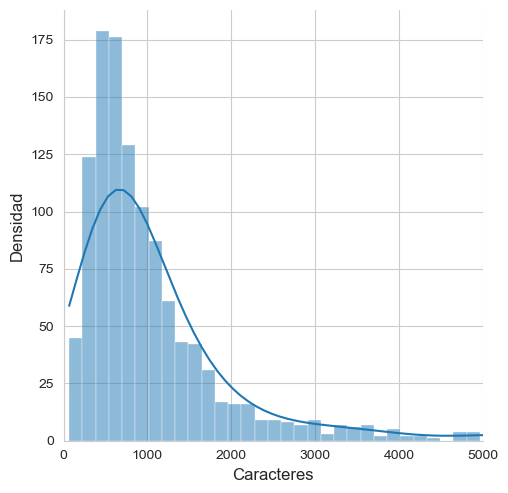

In [23]:
reviews["char_len"] = reviews["Reseña"].apply(lambda x: len(x))

fig = plt.figure(figsize=(14,12))
sns.set_style("whitegrid")

sns.displot(data=reviews, x="char_len", kde=True, legend=True)

plt.xlabel('Caracteres', fontsize=12)
plt.ylabel('Densidad', fontsize=12)
plt.xlim(0,5000)

plt.show()

Si observamos el histograma vemos que la mayoría de las reseñas tienen una longitud aproximadamente de 5.000 caracteres, que de hecho es el límite de caracteres que impone Amazon para una reseña. Sin embargo, hay bastantes reseñas que superan esta cifra por lo que estas reseñas las identificamos como outliers.
Para cerciorarnos a partir de qué longitud nos encontramos con outliers, vamos a observar el boxplot:

(0.0, 3000.0)

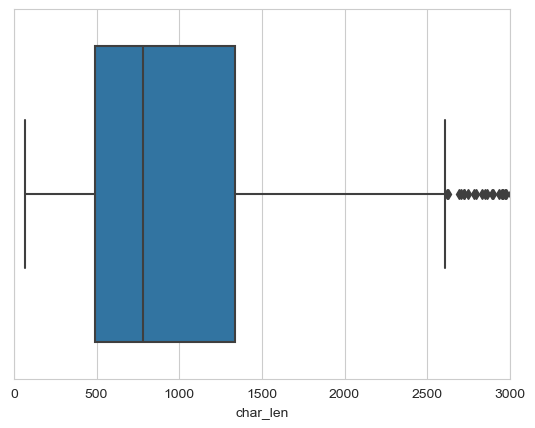

In [24]:
sns.boxplot(data=reviews, x="char_len")
plt.xlim(0,3000)

Para saber concretamente el valor del límite superior, realizamos los cálculos necesarios:

In [25]:
minimo = reviews["char_len"].quantile(0.25)
maximo = reviews["char_len"].quantile(0.75)
IQR = maximo - minimo
limite_superior = maximo + 1.5 * IQR
limite_superior

2612.0

In [26]:
longitud = reviews["char_len"]
longitud_outliers = longitud > limite_superior
longitud_outliers.value_counts()

char_len
False    1087
True      122
Name: count, dtype: int64

Eliminamos los outliers que superan el limite superior, 2.612.

In [27]:
reviews.drop(reviews[(reviews['char_len'] >limite_superior)].index, inplace=True)

## Análisis de contenido
Vamos a realizar el análisis de contenido a través de la visualización de un Word Cloud. 

In [28]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
txt_reviews = reviews['Reseña'].to_list()
combined_reviews = ','.join(txt_reviews)

Creamos el objeto WordCloud con la correspondiente configuración para obtener las posteriores visualizaciones:

In [30]:
en_stopwords = stopwords.words('english')

wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=0,
                      contour_color='steelblue', stopwords=en_stopwords,
                      normalize_plurals = True)

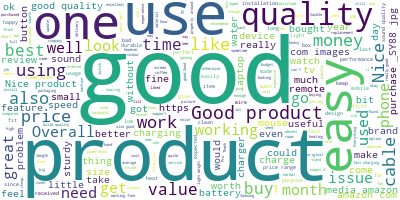

In [31]:
wordcloud.generate(combined_reviews)
wordcloud.to_image()

## Preprocesado y Normalización

Los pasos a realizar para el preprocesado de datos son los siguientes:

* **Expandir las contracciones**

In [32]:
!pip install contractions
import contractions

In [33]:
def replace_contraction(text):
    expanded_words = []

    for t in text.split():
        expanded_words.append(contractions.fix(t, slang = True))
    expanded_text = ' '.join(expanded_words)
    return expanded_text

In [34]:
reviews["Normalizado"] = reviews["Reseña"].apply(lambda x: replace_contraction(x))

* **Eliminar espacios extra y transformar a minísculas**

In [35]:
def eliminar_espacios(text):
    return  " ".join(text.split())

def texto_a_minisculas(text):
  return text.lower()

In [36]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [37]:
reviews["Normalizado"] = reviews["Normalizado"].progress_apply(lambda x: eliminar_espacios(x))
reviews["Normalizado"] = reviews["Normalizado"].progress_apply(lambda x: texto_a_minisculas(x))

100%|██████████| 1087/1087 [00:00<00:00, 361526.32it/s]


*   **Tokenización y normalización URL y números por tokens comunes**

In [38]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

def normalizar_tokens(documento):
    palabras = tokenizer.tokenize(documento)

    for i in range(len(palabras)):
        if palabras[i].startswith("http://") or palabras[i].startswith("https://") or palabras[i].startswith("www."):
            palabras[i] = "URL"
        elif palabras[i].isdigit():
            palabras[i] = "NUM"
    documento_modificado = ' '.join(palabras)

    return documento_modificado

In [39]:
reviews["Normalizado"] = reviews["Normalizado"].progress_apply(lambda x: normalizar_tokens(x))

100%|██████████| 1087/1087 [00:00<00:00, 1506.50it/s]


*   **Lematizar tokens, eliminar stopwords y eliminar sígnos de puntuación**

In [40]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def lematizar_eliminacion_tokens(texto):
    doc = nlp(texto)

    lemas = [token.lemma_ for token in doc] # Lematizamos

    tokens_filtrados = [token for token in lemas if token.isalpha() and token.lower() not in en_stopwords] # Eliminamos la puntuación y stopwords

    texto_procesado = ' '.join(tokens_filtrados)

    return texto_procesado

In [41]:
reviews["Texto_preprocesado"] = reviews["Normalizado"].progress_apply(lambda x: lematizar_eliminacion_tokens(x))

100%|██████████| 1087/1087 [00:12<00:00, 85.26it/s]


In [42]:
reviews.head()

,ID_producto,Producto,Categoria,Precio_descontado,Precio_real,Porcentaje_descuento,Calificacion,Recuento_votos,Descripcion_producto,ID_usuario,Nombre_usuario,ID_reseña,Titulo_reseña,Reseña,char_len,Normalizado,Texto_preprocesado
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories,399.0,1099.0,64.0,4.2,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,483,looks durable charging is fine too ##no compla...,look durable charging fine complain charge rea...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories,199.0,349.0,43.0,4.0,43994,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,1186,i ordered this cable to connect my phone to an...,order cable connect phone android auto car cab...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories,199.0,1899.0,90.0,3.9,7928,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",271,"not quite durable and sturdy , https : / / m ....",quite durable sturdy https medium amazon com i...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories,329.0,699.0,53.0,4.2,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",443,"good product , long wire , charges good , nice...",good product long wire charge good nice buy ca...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories,154.0,399.0,61.0,4.2,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",2451,"bought this instead of original apple , does t...",buy instead original apple work NUM rs fast ap...


In [43]:
txt_reviews = reviews['Texto_preprocesado'].to_list()
combined_reviews = ','.join(txt_reviews)

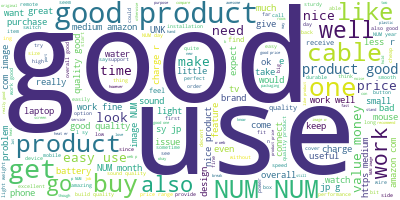

In [44]:
wordcloud.generate(combined_reviews)
wordcloud.to_image()

**Se guardan los datos preprocesados en un csv**

In [45]:
reviews.to_csv("C:\\Users\\danie\\Desktop\\TFM\\TFM-Reproducible\\Reviews\\procesado\\reviews_preprocessed.csv", index= False)

## Creación de etiquetas y Vectorización
De cara al entrenamiento y evaluación de modelos vamos a crear una nueva variable llamada *Sentimiento* que recogerá las etiquetas de cada reseña según si esta recoge un comentario Positivo, Negativo o Neutro. Para ello, nos vamos a ayudar de la variable *Calificacion* de forma que si el cliente da una puntuación entre 0 y 3 la etiqueta sea Negativo, entre 3 y 4 neutro, y entre 4 y 5 Positivo.

In [46]:
def clasificar_sentimiento(Calificacion):
    if Calificacion >= 0.0 and Calificacion < 3.0:
        return 'Negativo'
    elif Calificacion >= 3.0 and Calificacion < 4.0:
        return 'Neutro'
    elif Calificacion >= 4.0 and Calificacion <= 5.0:
        return 'Positivo'

In [47]:
reviews['Sentimiento'] = reviews['Calificacion'].apply(clasificar_sentimiento)

In [48]:
reviews.Sentimiento.value_counts()

Sentimiento
Positivo    790
Neutro      291
Negativo      6
Name: count, dtype: int64

In [49]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1087 entries, 0 to 1464
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   ID_producto           1087 non-null   object  
 1   Producto              1087 non-null   object  
 2   Categoria             1087 non-null   category
 3   Precio_descontado     1087 non-null   float64 
 4   Precio_real           1087 non-null   float64 
 5   Porcentaje_descuento  1087 non-null   float64 
 6   Calificacion          1087 non-null   float64 
 7   Recuento_votos        1087 non-null   int32   
 8   Descripcion_producto  1087 non-null   object  
 9   ID_usuario            1087 non-null   object  
 10  Nombre_usuario        1087 non-null   object  
 11  ID_reseña             1087 non-null   object  
 12  Titulo_reseña         1087 non-null   object  
 13  Reseña                1087 non-null   object  
 14  char_len              1087 non-null   int64   
 15  Normaliza

Para generar los vectores de características vamos a utilizar el método TFID, al que le incorporaremos más adelante otras características:

In [50]:
vectorizador = TfidfVectorizer(lowercase = False, stop_words =None,
                               min_df=0.005, ngram_range = (1,3))

vector_data = vectorizador.fit_transform(reviews['Texto_preprocesado'])

Generamos características adicionales:

In [51]:
def token_appearance(document, token = "URL"):
  return len([x for x in document.split() if x == token])

In [52]:
reviews["num_URLS"] = reviews["Texto_preprocesado"].progress_apply(lambda x: token_appearance(x, token="URL"))
reviews["num_NUM"] = reviews["Texto_preprocesado"].progress_apply(lambda x: token_appearance(x, token="NUM"))

100%|██████████| 1087/1087 [00:00<00:00, 109514.75it/s]


Ahora vamos a incorporar análisis de sentimiento a través del uso de diccionarios de sentimiento como TextBlob. Esta librería nos permitirá extraer el sentimiento que tiene un texto (polaridad y subjetividad)

In [53]:
reviews["tweet_sentiment_polarity"] = reviews["Texto_preprocesado"].apply(lambda x: TextBlob(x).sentiment.polarity)
reviews["tweet_sentiment_subjectivity"] = reviews["Texto_preprocesado"].apply(lambda x: TextBlob(x).sentiment.subjectivity)

Denominamos extra_features al conjunto de estas variables que hemos obtenido y que queremos considerar para el entrenamiento:

In [54]:
extra_features = reviews[['num_URLS','num_NUM', 'tweet_sentiment_polarity', 'tweet_sentiment_subjectivity']]

Observamos el dataset resultante para comprobar la presencia de todas las características adicionales:

In [55]:
reviews.head()

,ID_producto,Producto,Categoria,Precio_descontado,Precio_real,Porcentaje_descuento,Calificacion,Recuento_votos,Descripcion_producto,ID_usuario,...,Titulo_reseña,Reseña,char_len,Normalizado,Texto_preprocesado,Sentimiento,num_URLS,num_NUM,tweet_sentiment_polarity,tweet_sentiment_subjectivity
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories,399.0,1099.0,64.0,4.2,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",...,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,483,looks durable charging is fine too ##no compla...,look durable charging fine complain charge rea...,Positivo,0,2,0.365741,0.616667
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories,199.0,349.0,43.0,4.0,43994,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",...,"A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,1186,i ordered this cable to connect my phone to an...,order cable connect phone android auto car cab...,Positivo,0,4,0.312788,0.539515
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories,199.0,1899.0,90.0,3.9,7928,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...",...,"Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",271,"not quite durable and sturdy , https : / / m ....",quite durable sturdy https medium amazon com i...,Neutro,0,4,0.633333,0.866667
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories,329.0,699.0,53.0,4.2,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...",...,"Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",443,"good product , long wire , charges good , nice...",good product long wire charge good nice buy ca...,Positivo,0,3,0.398611,0.616667
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories,154.0,399.0,61.0,4.2,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...",...,"As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",2451,"bought this instead of original apple , does t...",buy instead original apple work NUM rs fast ap...,Positivo,0,10,0.355130,0.636067


Unimos las características TFID con las que acabamos de definir:

In [56]:
reviews["Sentimiento"] = reviews["Sentimiento"].map({'Positivo': 1, 'Negativo': 0, 'Neutro': 2})

y = reviews["Sentimiento"].values.astype(np.float32)
X = sp.sparse.hstack((vector_data,extra_features.values),format='csr')

## División en train/test y Modelado

Dividimos en Train y Test:

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=0,
                                                    stratify = y)
print(X_train.shape)
print(X_test.shape)

(815, 3618)
(272, 3618)



Vamos a proceder a solucionar el problema que nos hemos encontrado respecto al desbalanceo de los datos. Para ello vamos a utilizar SMOTE:

In [58]:
sm = SMOTE(random_state=42, k_neighbors=3)

X_res, y_res = sm.fit_resample(X_train, y_train)

Comprobamos que está balanceado:

In [59]:
np.array(np.unique(y_res, return_counts=True)).T

array([[  0., 592.],
       [  1., 592.],
       [  2., 592.]])

Definimos una función que nos ayudará a medir la calidad de varios modelos:

In [60]:
def model_evaluation(models, score, X, y):
      results = []
      names = []

      for name, model in models:
          warnings.filterwarnings('ignore')

          KF = KFold(n_splits = 10, shuffle = True, random_state = 98)


          cv_results = cross_val_score(model, X, y, cv = KF, scoring = score, verbose = False)

          results.append(cv_results)
          names.append(name)

          print('Metric: {} , KFold '.format(str(score)))
          print("%s: %f (%f) " % (name, cv_results.mean(), cv_results.std()))

      return results, names

Y la utilizamos:

In [61]:
models = [
         ("Logistic",LogisticRegression(random_state=30)),
         ("GaussianNB",GaussianNB()),
         ("DecisionTree",DecisionTreeClassifier()),
         ("RandomForest",RandomForestClassifier()),
]

evaluation_score = "accuracy"

model_evaluation(models,  evaluation_score, X_res.toarray(), y_res)

Metric: accuracy , KFold 
Logistic: 0.902047 (0.034116) 
Metric: accuracy , KFold 
GaussianNB: 0.957214 (0.013339) 
Metric: accuracy , KFold 
DecisionTree: 0.815286 (0.025131) 
Metric: accuracy , KFold 
RandomForest: 0.930182 (0.020024) 


([array([0.90449438, 0.89325843, 0.88202247, 0.96067416, 0.88764045,
         0.84831461, 0.94915254, 0.92090395, 0.91525424, 0.85875706]),
  array([0.97191011, 0.9494382 , 0.94382022, 0.97752809, 0.9494382 ,
         0.93820225, 0.97175141, 0.96045198, 0.96610169, 0.94350282]),
  array([0.83707865, 0.80337079, 0.79213483, 0.85393258, 0.83146067,
         0.8258427 , 0.83050847, 0.7740113 , 0.82485876, 0.77966102]),
  array([0.93258427, 0.93258427, 0.8988764 , 0.96067416, 0.92134831,
         0.93258427, 0.96045198, 0.91525424, 0.94350282, 0.9039548 ])],
 ['Logistic', 'GaussianNB', 'DecisionTree', 'RandomForest'])

Observamos claramente que `GaussianNB()` es la métrica que nos arroja mejores resultados, con un accuracy del 0.957779. Por lo tanto, intentaremos afinar los hiperparámetros de esta métrica:

In [62]:
model = GaussianNB()
from collections import Counter

class_distribution = Counter(y_train)
total_samples = len(y_train)
priors = [class_distribution[i] / total_samples for i in sorted(class_distribution.keys())]

param_grid = {
    'priors': [None, priors],  
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  
}
cv = KFold(n_splits=10)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

In [63]:
sm = SMOTE(random_state=42, k_neighbors=3)
X_train_denso = X_train.toarray()
X_res, y_res = sm.fit_resample(X_train_denso, y_train)

In [64]:
grid_result = grid_search.fit(X_res, y_res)
print("Mejor accuracy: %f usando los parámetros %s" % (grid_result.best_score_, grid_result.best_params_))

Mejor accuracy: 0.962921 usando los parámetros {'priors': None, 'var_smoothing': 1e-09}


In [65]:
model= GaussianNB()
model.fit(X_res,y_res)

GaussianNB()

## Predicción

Predecimos y sacamos el classification report:

In [66]:
X_test_denso = X_test.toarray()
y_pred = model.predict(X_test_denso)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[  0   1   0]
 [  0 195   3]
 [  0  61  12]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.76      0.98      0.86       198
         2.0       0.80      0.16      0.27        73

    accuracy                           0.76       272
   macro avg       0.52      0.38      0.38       272
weighted avg       0.77      0.76      0.70       272



Repetimos el proceso para los datos no balanceados, con el fin de comparar ambos resultados:

In [67]:
#models = [
#         ("Logistic",LogisticRegression(random_state=30)),
#         ("GaussianNB",GaussianNB()),
#         ("DecisionTree",DecisionTreeClassifier()),
#         ("RandomForest",RandomForestClassifier()),
#]
#
#evaluation_score = "accuracy"
#
#model_evaluation(models,  evaluation_score, X_train.toarray(), y_train)

In [68]:
#model= RandomForestClassifier()
#model.fit(X_train,y_train)

In [69]:
#y_pred = model.predict(X_test)
#print(confusion_matrix(y_test,y_pred))
#print(classification_report(y_test,y_pred))

Con los datos no balanceados se obtiene un accuracy menor. 

Ahora se va a observar la precisión de la predicción de forma más detallada, para lo que se va a obtener la matriz de confusión:

In [70]:
cm = confusion_matrix(y_test, y_pred) 

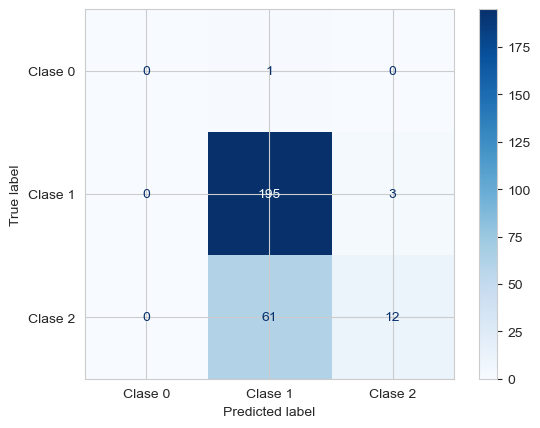

In [71]:
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Clase 0', 'Clase 1', 'Clase 2']).plot(cmap=plt.cm.Blues)
plt.show()

## Sistema de recomendación

Se va a crear un sistema de recomendación que devuelva, introduciendo el ID de un usuario, diez recomendaciones de productos ordenados por sus respectivas puntuaciones.

En primer lugar vamos a codificar la variable *ID_usuario* para poder crear el sistema de recomendación y que luego nos resulte más fácil ingresar el ID para ver las recomendaciones. Esta transformación a númerica la hacemos con la función ```LabelEncoder()```, que ya conocemos.

In [72]:
le = LabelEncoder()
reviews['ID_usuario_codificado'] = le.fit_transform(reviews['ID_usuario'])

Ahora se va a crear un dataframe nuevo que recoja una tabla de frecuencias, es decir, que recoja la frecuencia de cada usuario.

In [73]:
freq_table = pd.DataFrame({'ID_usuario': reviews['ID_usuario_codificado'].value_counts().index, 
                           'Frecuencia': reviews['ID_usuario_codificado'].value_counts().values})


Definiremos la función con la que luego ingresaremos el ID_usuario y nos devolverá las recomendaciones. 

In [74]:
def recommend_products(reviews, ID_usuario_codificado):
    tfidf = TfidfVectorizer(stop_words='english')
    reviews['Descripcion_producto'] = reviews['Descripcion_producto'].fillna('')
    tfidf_matrix = tfidf.fit_transform(reviews['Descripcion_producto'])

    historial = reviews[reviews['ID_usuario_codificado'] == ID_usuario_codificado]

    indices = historial.index.tolist()

    if indices:
        cosine_sim_user = cosine_similarity(tfidf_matrix[indices], tfidf_matrix)
        
        products = reviews.iloc[indices]['Producto']
        indices = pd.Series(products.index, index=products)

        similarity_scores = list(enumerate(cosine_sim_user[-1]))
        similarity_scores = [(i, score) for (i, score) in similarity_scores if i not in indices]

        similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

        top_products = [i[0] for i in similarity_scores[1:11]]

        productos_recomendados = reviews.iloc[top_products]['Producto'].tolist()

        score = [similarity_scores[i][1] for i in range(10)]

        results_df = pd.DataFrame({'Productos recomendados': productos_recomendados,
                                   'Puntuación': score})

        return results_df

    else:
        print("No hay resultados")
        return None

Probamos el código:

In [75]:
recommend_products(reviews, 562)

,Productos recomendados,Puntuación
0,Wayona Nylon Braided (2 Pack) Lightning Fast U...,1.000000
1,"ESR USB C to Lightning Cable, 10 ft (3 m), MFi...",0.431397
2,Wayona Nylon Braided USB to Lightning Fast Cha...,0.431182
3,Wayona Type C to Lightning MFI Certified 20W F...,0.422402
4,iPhone Original 20W C Type Fast PD Charger Com...,0.377856
5,Portronics Adapto 20 Type C 20W Fast PD/Type C...,0.347700
6,Wayona Usb Nylon Braided Data Sync And Chargin...,0.320295
7,Amazon Basics USB A to Lightning PVC Molded Ny...,0.305869
8,Amazon Basics USB A to Lightning MFi Certified...,0.305749
9,SWAPKART Fast Charging Cable and Data Sync USB...,0.298644
